In [1]:
import eagleSqlTools as sql
import numpy as np
import matplotlib.pyplot as plt

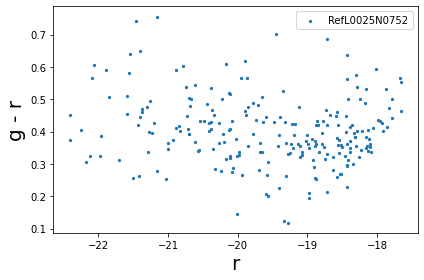

231


In [23]:
# This uses the eagleSqlTools module to connect to the database with your username and password.
# If the password is not given, the module will prompt for it.
con = sql.connect("vwg533", password = "FZtn087h")

sim_name = 'RefL0025N0752' #'RefL0100N1504'
sim_size = 25.

# Select the quantities we want
myQuery = "SELECT \
            (MAG.g_nodust - MAG.r_nodust) as g_minus_r, \
            MAG.r_nodust as r \
           FROM \
            %s_SubHalo as SH, \
            %s_Magnitudes as MAG, \
            %s_Aperture as AP \
           WHERE \
            SH.SnapNum = 27 and \
            SH.SubGroupNumber = 0 and \
            AP.Mass_Star > 1.0e9 and \
            AP.ApertureSize = 30 and \
            SH.GalaxyID = MAG.GalaxyID and \
            SH.GalaxyID = AP.GalaxyID"%(sim_name, sim_name, sim_name)

# Execute query.
myData 	= sql.execute_query(con, myQuery)

plt.scatter(myData['r'], myData['g_minus_r'], label=sim_name, s = 5)

# Label plot.
plt.xlabel('r', fontsize=20)
plt.ylabel('g - r', fontsize=20)
plt.tight_layout()
plt.legend()
plt.show()
print(len(myData['r']))

#plt.savefig('GSMF.png')
plt.close()

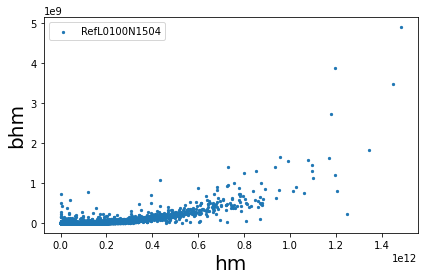

In [24]:
# This uses the eagleSqlTools module to connect to the database with your username and password.
# If the password is not given, the module will prompt for it.
con = sql.connect("vwg533", password = "FZtn087h")

sim_name = 'RefL0100N1504' #'RefL0100N1504'
sim_size = 100.

myQuery = "SELECT \
AP_Star.Mass_DM as hm, \
SH.BlackHoleMass as bhm \
FROM \
%s_Subhalo as SH, \
%s_Aperture as AP_Star \
WHERE \
SH.SnapNum = 27 \
and SH.GalaxyID = AP_Star.GalaxyID \
and AP_Star.ApertureSize = 30 \
and AP_Star.Mass_DM > 0 \
and SH.BlackHoleMass > 0"%(sim_name, sim_name)

# Execute query.
myData 	= sql.execute_query(con, myQuery)

plt.scatter(myData['hm'], myData['bhm'], label=sim_name, s = 5)

# Label plot.
plt.xlabel('hm', fontsize=20)
plt.ylabel('bhm', fontsize=20)
plt.tight_layout()
plt.legend()
plt.show()

#plt.savefig('.png')
plt.close()